In [1]:
# uniquement pour utliser dans colab : 

# !git clone https://github.com/CarinePivoteau/Alea2023Notebooks.git
# import sys
# sys.path.append('/content/Alea2023Notebooks')

In [2]:
# si les modules ne sont pas installés :

# import sys
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install graphviz

In [3]:
import sys
sys.path.append('../')

# imports : random, time, math, sys, plt, graphviz

from helpers import *
from gen_laws import *

In [4]:
P = {}
P[.9] = 777564.20335958218103 # E(N) = 143
P[.99] = 4.815108827e69       # E(N) = 16235
P[.995] = 9.343610520e140     # E(N) = 65368
P[.997] = 1.291120564e236     # E(N) = 182055

## Exo : écrire le générateur de Boltzmann de partitions d'entiers (non étiqueté)

In [5]:
# P = Set(I), I = Sequence(Z,card>=1)

def indiceMax(x):
    u = random.random()
    v = math.log(1/u)
    p = math.log(P[x])
    k = 0
    while v<p :
        k += 1
        p -= x**k/(k*(1-x**k))
    return k

def random_partition_free(x):
    k = indiceMax(x)
    #print("indice max = ", k)
    size, summands = 0, []
    if k == 0:
        return size, summands
    for i in range(1,k):
        pi = poiss(x**i/(i*(1-x**i)))
        for j in range(pi):
            summand = fast_geom(x**i)+1
            for l in range(i):
                summands.append(summand)
            size += i*summand
    pi = non_zero_poiss(x**k/(k*(1-x**k)))
    for j in range(pi):
        summand = fast_geom(x**k)+1
        for l in range(k):
            summands.append(summand)
        size += k*summand
    return size,summands

In [6]:
ip = random_partition_free(.997)
p = sorted(ip[1],reverse = True)
print("taille = {}, plus grand sommant = {}, nombre de sommants = {}".format(ip[0], p[0], (len(ip[1]))))

taille = 179175, plus grand sommant = 1975, nombre de sommants = 1588


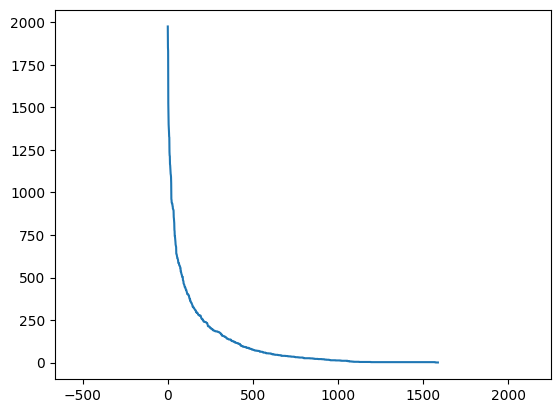

In [7]:
import matplotlib.pyplot as plt
plt.plot(p)
plt.axis('equal')
plt.show()

## Exo : écrire la fonction qui permet d'extraire la partition en sommants distincts d'une partition classique et tracer le rapport de leur tailles.

In [8]:
from collections import defaultdict

def extract_partition_distincts(l):
    q = []
    counts = defaultdict(int)
    for summand in l:
        counts[summand] += 1
    for k,v in counts.items():
        if v%2 == 1 :
            q.append(k)
    return q
    

In [9]:
ip = random_partition_free(.997)
print(sum(ip[1]),sum(extract_partition_distincts(ip[1])))

174327 78157


In [10]:
s,d,l = [],[], []
for _ in range(1000):
    ip = random_partition_free(.995)
    sizeP = sum(ip[1])
    sizeQ = sum(extract_partition_distincts(ip[1]))
    s.append(sizeP)
    d.append(sizeQ)
    l.append(sizeQ/sizeP)


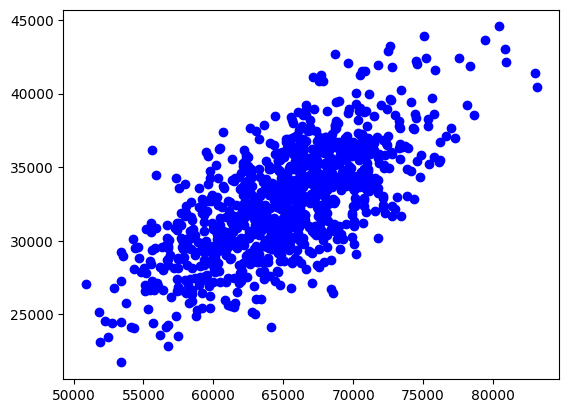

In [11]:
plt.plot(s,d,'bo')

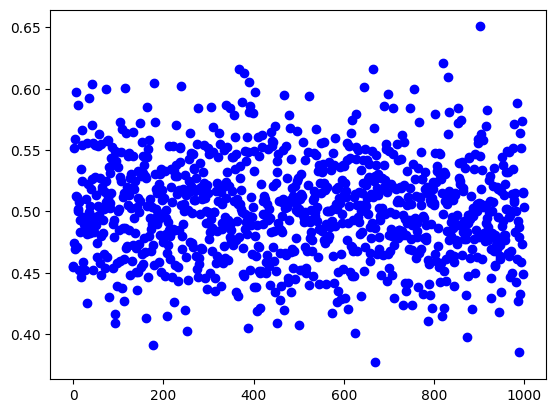

In [12]:
plt.plot(l,'bo')

### Il n'est pas nécessaire d'engendredr "complètement" la partition pour avoir celle en sommants disctincts : 

In [13]:
def random_partition_distincts_free(x):
    k = indiceMax(x)
    #print("indice max = ", k)
    sizeP, sizeGen, summands = 0, 0, set()
    if k == 0:
        return sizeP, sizeGen, summands
    for i in range(1,k):
        pi = poiss(x**i/(i*(1-x**i)))
        for j in range(pi):
            summand = fast_geom(x**i)+1
            if(i % 2 != 0):
                if(summand in summands):
                    summands.remove(summand)
                else: 
                    summands.add(summand)  
                sizeGen += summand
            sizeP += i*summand
    pi = non_zero_poiss(x**k/(k*(1-x**k)))
    for j in range(pi):
        summand = fast_geom(x**k)+1
        if(k % 2 != 0):
            if(summand in summands):
                summands.remove(summand)
            else: 
                summands.add(summand)  
            sizeGen += summand
        sizeP += k*summand
    return sizeP, sizeGen, summands

In [14]:
ip = random_partition_distincts_free(.997)
p = sorted(ip[2],reverse = True)
print("taille de P = {}, taille engendrée = {}, taille de Q = {}".format(ip[0], ip[1], sum(p)))
print("plus grand sommant = {}, nombre de sommants = {}".format(p[0], len(p)))

taille de P = 181969, taille engendrée = 109291, taille de Q = 81763
plus grand sommant = 2368, nombre de sommants = 212
